In [3]:
%pip install google-play-scraper textblob openpyxl
%pip install nltk
%pip install wordcloud

from google_play_scraper import Sort, reviews_all
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud


[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
reviews = reviews_all(
    'com.brastelremit',
    lang='en',
    country='us',
    sort=Sort.NEWEST
)

In [5]:
reviews_df = pd.DataFrame(reviews)
reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2db57d24-12b4-4e08-8798-7c02af8abfdb,macky,https://play-lh.googleusercontent.com/a/ACg8oc...,low exchange and very slow transfer 3days befo...,1,0,3.15.0,2025-05-02 17:03:16,None,NaT,3.15.0
1,566a6205-cb77-4032-afb0-24c3caed7a0b,Aditya Kumar Jaiswal,https://play-lh.googleusercontent.com/a-/ALV-U...,nice 👍🏻,5,0,None,2025-04-15 23:22:45,None,NaT,None
2,fff0ea2f-0f08-42a9-b7c9-01c94536dc2b,Hara Alex,https://play-lh.googleusercontent.com/a/ACg8oc...,ótimo,5,0,3.13.0,2025-03-21 12:53:33,None,NaT,3.13.0
3,93b1c669-1785-42fc-b33a-4b21931bd95e,Gulzaman khan Gulzaman khan,https://play-lh.googleusercontent.com/a/ACg8oc...,Good aap for money transfer👍🏻👍🏻👍🏻👍🏻,5,0,3.11.0,2025-01-17 20:58:12,None,NaT,3.11.0
4,95b847e8-d834-4c43-ae84-254424bc2f9b,Burkhanov Saidakhror,https://play-lh.googleusercontent.com/a-/ALV-U...,The worst money transfer service I have ever s...,1,0,3.10.0,2024-12-12 09:14:18,We apologize for the inconvenience. To comply ...,2024-12-12 15:33:05,3.10.0


In [6]:
def getCustomerFeeling(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [9]:
reviews_df['sentiment'] = reviews_df['content'].apply(getCustomerFeeling)



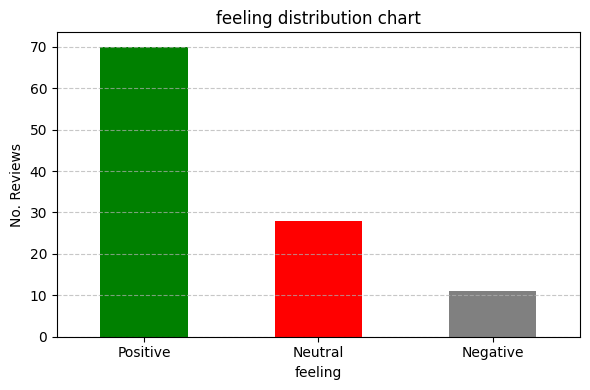

In [10]:
sentiment_counts = reviews_df['sentiment'].value_counts()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('feeling distribution chart')
plt.xlabel('feeling')
plt.ylabel('No. Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    return text

reviews_df['cleaned_content'] = reviews_df['content'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabrieldasneves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


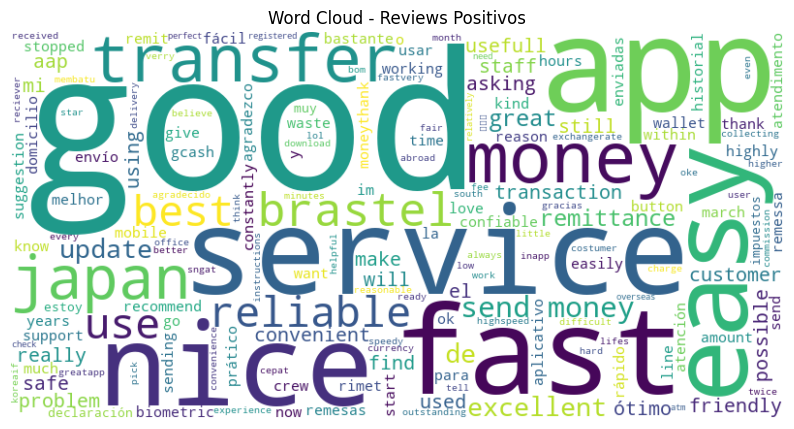

In [29]:
positive_reviews = reviews_df[reviews_df['score'] >= 4]
positive_text = " ".join(review for review in positive_reviews['cleaned_content'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Reviews Positivos')
plt.show()



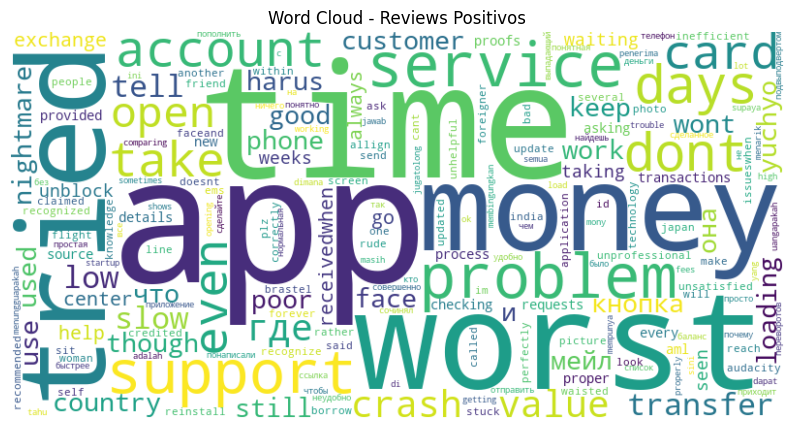

In [28]:
negative_reviews = reviews_df[reviews_df['score']  <= 2]
negative_text = " ".join(review for review in negative_reviews['cleaned_content'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Reviews Positivos')
plt.show()

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


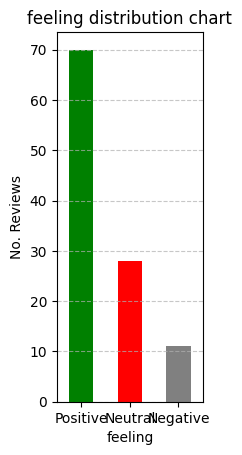

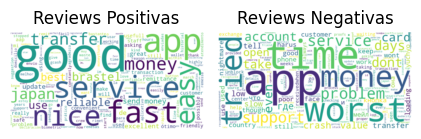

In [37]:

sentiment_counts = reviews_df['sentiment'].value_counts()

plt.subplot(1, 3, 1)
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('feeling distribution chart')
plt.xlabel('feeling')
plt.ylabel('No. Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
# Word cloud positiva
plt.subplot(1, 3, 2)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Reviews Positivas')

# Word cloud negativa
plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Reviews Negativas')

plt.tight_layout()
plt.show()
